# Preprocessing and Embeddings

## Dependencies

In [62]:
!pip install datasets
!pip install kaggle
!pip install kagglehub
!pip install textstat
!pip install seaborn
!pip install matplotlib
!pip install nltk
!pip install sklearn
!pip install transformers
!pip install torch
!pip install torchvision


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subpro

## Load the datasets

In [77]:
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("emineyetm/fake-news-detection-datasets") + "/News _dataset"

print("Path to dataset files:", path)

fake_ds = pd.read_csv(path + "/Fake.csv")
true_ds = pd.read_csv(path + "/True.csv")

Path to dataset files: /Users/ricardomendezcavalieri/.cache/kagglehub/datasets/emineyetm/fake-news-detection-datasets/versions/1/News _dataset


In [78]:
true_ds.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [79]:
fake_ds.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [80]:
# Merge the datasets and add a label column

fake_ds['label'] = 0
fake_ds.head()
true_ds['label'] = 1
true_ds.head()

dataset = pd.concat([fake_ds, true_ds])
dataset.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


## Check the quality of the text

In [ ]:
import textstat

# Calculate the readability of the text
dataset['gunning_fog']=dataset['text'].apply(lambda x: textstat.gunning_fog(x))
dataset['flesch_reading_ease']=dataset['text'].apply(lambda x: textstat.flesch_reading_ease(x))

dataset['title_gunning_fog']=dataset['title'].apply(lambda x: textstat.gunning_fog(x))
dataset['title_flesch_reading_ease']=dataset['title'].apply(lambda x: textstat.flesch_reading_ease(x))


dataset.head()


,title,text,subject,date,label,gunning_fog,flesch_reading_ease
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,9.24,62.68
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,11.22,45.86
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,9.55,63.59
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,10.21,53.61
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,11.64,58.62


## Sentiment Analysis

In [82]:
# Load the VADER lexicon
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Calculate the sentiment score for each text
dataset['compound_sentiment_score'] = dataset['text'].apply(lambda x: sia.polarity_scores(x)['compound'])
dataset['sentiment_score'] = dataset['text'].apply(lambda x: sia.polarity_scores(x)['pos'] - sia.polarity_scores(x)['neg'])
dataset['neutral_score'] = dataset['text'].apply(lambda x: sia.polarity_scores(x)['neu'])
dataset['negative_score'] = dataset['text'].apply(lambda x: sia.polarity_scores(x)['neg'])
dataset['positive_score'] = dataset['text'].apply(lambda x: sia.polarity_scores(x)['pos'])

dataset['title_compound_sentiment_score'] = dataset['title'].apply(lambda x: sia.polarity_scores(x)['compound'])
dataset['title_sentiment_score'] = dataset['title'].apply(lambda x: sia.polarity_scores(x)['pos'] - sia.polarity_scores(x)['neg'])
dataset['title_neutral_score'] = dataset['title'].apply(lambda x: sia.polarity_scores(x)['neu'])
dataset['title_negative_score'] = dataset['title'].apply(lambda x: sia.polarity_scores(x)['neg'])
dataset['title_positive_score'] = dataset['title'].apply(lambda x: sia.polarity_scores(x)['pos'])

dataset.head()

# Calculate the average sentiment score
dataset['compound_sentiment_score'].mean()

np.float64(-0.014180515835894698)

Average sentiment scores by news type (0=Fake, 1=Real):
       compound_sentiment_score  sentiment_score  neutral_score  \
label                                                             
0                     -0.083855        -0.003797       0.787757   
1                      0.062209         0.004478       0.841031   

       negative_score  positive_score  
label                                  
0            0.094605        0.090807  
1            0.077222        0.081700  


<Figure size 1000x600 with 0 Axes>

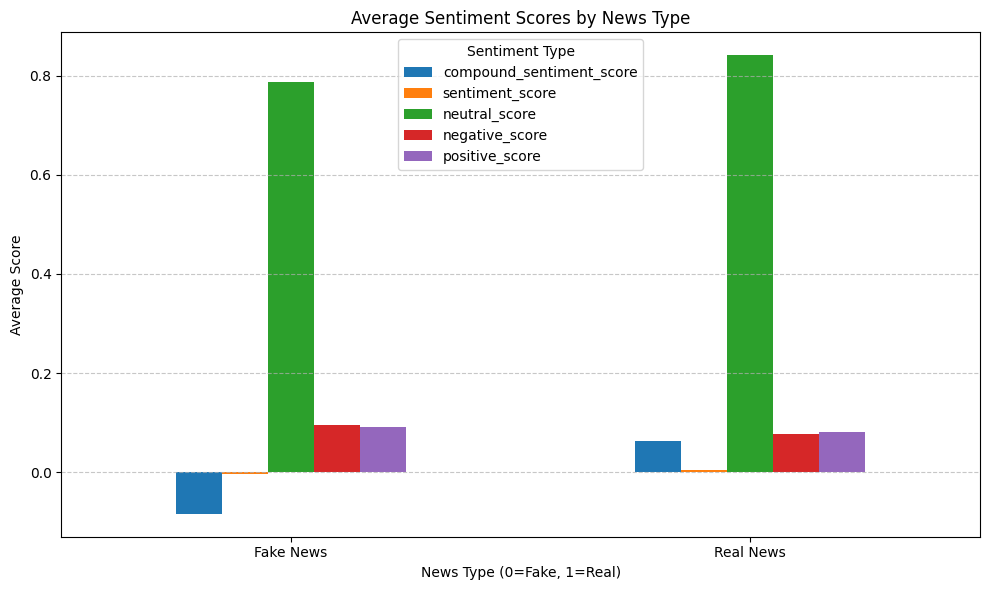

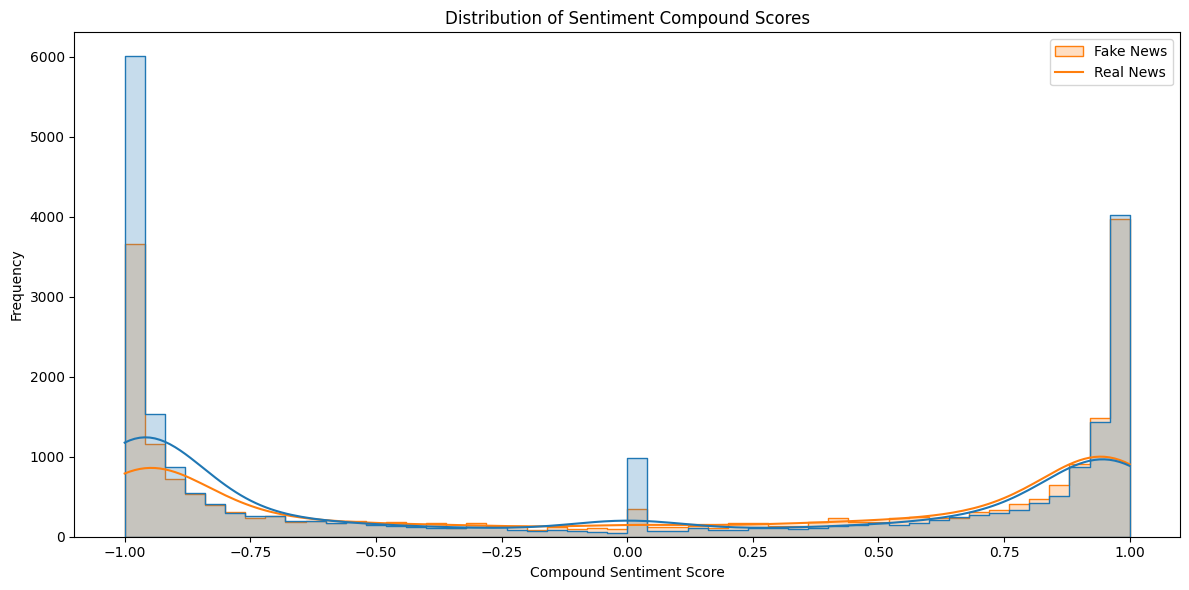

In [85]:
dataset['sentiment_score'].head()

sentiment_by_label = dataset.groupby('label')[
    ['compound_sentiment_score', 'sentiment_score', 'neutral_score', 'negative_score', 'positive_score']
].mean()

print("Average sentiment scores by news type (0=Fake, 1=Real):")
print(sentiment_by_label)

# Visualize the sentiment differences
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sentiment_by_label.plot(kind='bar', figsize=(10, 6))
plt.title('Average Sentiment Scores by News Type')
plt.xlabel('News Type (0=Fake, 1=Real)')
plt.ylabel('Average Score')
plt.xticks([0, 1], ['Fake News', 'Real News'], rotation=0)
plt.legend(title='Sentiment Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot distribution of compound sentiment scores
plt.figure(figsize=(12, 6))
sns.histplot(data=dataset, x='compound_sentiment_score', hue='label', 
             bins=50, kde=True, element='step', common_norm=False)
plt.title('Distribution of Sentiment Compound Scores')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.legend(labels=['Fake News', 'Real News'])
plt.tight_layout()
plt.show()

## Data Preprocessing: Removing stopwords, tokenization, lemmatization

In [86]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ricardomendezcavalieri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [87]:
# Drop rows with missing values

dataset = dataset.dropna()
dataset.head()

,title,text,subject,date,label,gunning_fog,flesch_reading_ease,compound_sentiment_score,sentiment_score,neutral_score,negative_score,positive_score
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,9.24,62.68,-0.8681,0.010,0.705,0.143,0.153
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,11.22,45.86,-0.7141,-0.012,0.834,0.089,0.077
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,9.55,63.59,-0.9958,-0.093,0.792,0.150,0.057
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,10.21,53.61,-0.9243,-0.033,0.878,0.078,0.045
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,11.64,58.62,0.5396,0.004,0.848,0.074,0.078


In [88]:
# Remove stopwords

stop_words = set(stopwords.words('english'))

dataset['text'] = dataset['text'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word not in stop_words]))
dataset['title'] = dataset['title'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word not in stop_words]))

# Remove punctuation

dataset['text'] = dataset['text'].apply(lambda x: ' '.join([word for word in x.split() if word.isalpha()]))
dataset['title'] = dataset['title'].apply(lambda x: ' '.join([word for word in x.split() if word.isalpha()]))

dataset.head()

,title,text,subject,date,label,gunning_fog,flesch_reading_ease,compound_sentiment_score,sentiment_score,neutral_score,negative_score,positive_score
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump wish americans happy new year lea...,News,"December 31, 2017",0,9.24,62.68,-0.8681,0.010,0.705,0.143,0.153
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017",0,11.22,45.86,-0.7141,-0.012,0.834,0.089,0.077
2,Sheriff David Clarke Becomes An Internet Joke...,on revealed former milwaukee sheriff david con...,News,"December 30, 2017",0,9.55,63.59,-0.9958,-0.093,0.792,0.150,0.057
3,Trump Is So Obsessed He Even Has Obama’s Name...,on christmas donald trump announced would back...,News,"December 29, 2017",0,10.21,53.61,-0.9243,-0.033,0.878,0.078,0.045
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used annual christmas day message...,News,"December 25, 2017",0,11.64,58.62,0.5396,0.004,0.848,0.074,0.078


In [ ]:
# Lemmatization

lemmatizer = WordNetLemmatizer()

dataset['text'] = dataset['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
dataset['title'] = dataset['title'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

dataset.head()


,title,text,subject,date,label,gunning_fog,flesch_reading_ease,compound_sentiment_score,sentiment_score,neutral_score,negative_score,positive_score
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump wish american happy new year leav...,News,"December 31, 2017",0,9.24,62.68,-0.8681,0.010,0.705,0.143,0.153
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017",0,11.22,45.86,-0.7141,-0.012,0.834,0.089,0.077
2,Sheriff David Clarke Becomes An Internet Joke...,on revealed former milwaukee sheriff david con...,News,"December 30, 2017",0,9.55,63.59,-0.9958,-0.093,0.792,0.150,0.057
3,Trump Is So Obsessed He Even Has Obama’s Name...,on christmas donald trump announced would back...,News,"December 29, 2017",0,10.21,53.61,-0.9243,-0.033,0.878,0.078,0.045
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used annual christmas day message...,News,"December 25, 2017",0,11.64,58.62,0.5396,0.004,0.848,0.074,0.078


In [ ]:
# tokenize

dataset['text'] = dataset['text'].apply(lambda x: word_tokenize(x))
dataset['title'] = dataset['title'].apply(lambda x: word_tokenize(x))

dataset.head()


,title,text,subject,date,label,gunning_fog,flesch_reading_ease,compound_sentiment_score,sentiment_score,neutral_score,negative_score,positive_score
0,Donald Trump Sends Out Embarrassing New Year’...,"[donald, trump, wish, american, happy, new, ye...",News,"December 31, 2017",0,9.24,62.68,-0.8681,0.010,0.705,0.143,0.153
1,Drunk Bragging Trump Staffer Started Russian ...,"[house, intelligence, committee, chairman, dev...",News,"December 31, 2017",0,11.22,45.86,-0.7141,-0.012,0.834,0.089,0.077
2,Sheriff David Clarke Becomes An Internet Joke...,"[on, revealed, former, milwaukee, sheriff, dav...",News,"December 30, 2017",0,9.55,63.59,-0.9958,-0.093,0.792,0.150,0.057
3,Trump Is So Obsessed He Even Has Obama’s Name...,"[on, christmas, donald, trump, announced, woul...",News,"December 29, 2017",0,10.21,53.61,-0.9243,-0.033,0.878,0.078,0.045
4,Pope Francis Just Called Out Donald Trump Dur...,"[pope, francis, used, annual, christmas, day, ...",News,"December 25, 2017",0,11.64,58.62,0.5396,0.004,0.848,0.074,0.078
